In [140]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
df=pd.read_csv('housing.csv')

In [142]:
# Data Cleaning

In [143]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [145]:
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population

In [146]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [147]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [148]:
unique_value=df['ocean_proximity'].unique()

In [149]:
print(unique_value)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [150]:
# Mapping object values of ocean_proximity into integer value foe better comparison
df['ocean_proximity']=df['ocean_proximity'].map({'NEAR BAY':1,'<IH OCEAN':2,'INLAND':3,'NEAR OCEAN':4,'ISLAND':5})

In [151]:
# EDA (Exploratory Data Analysis)

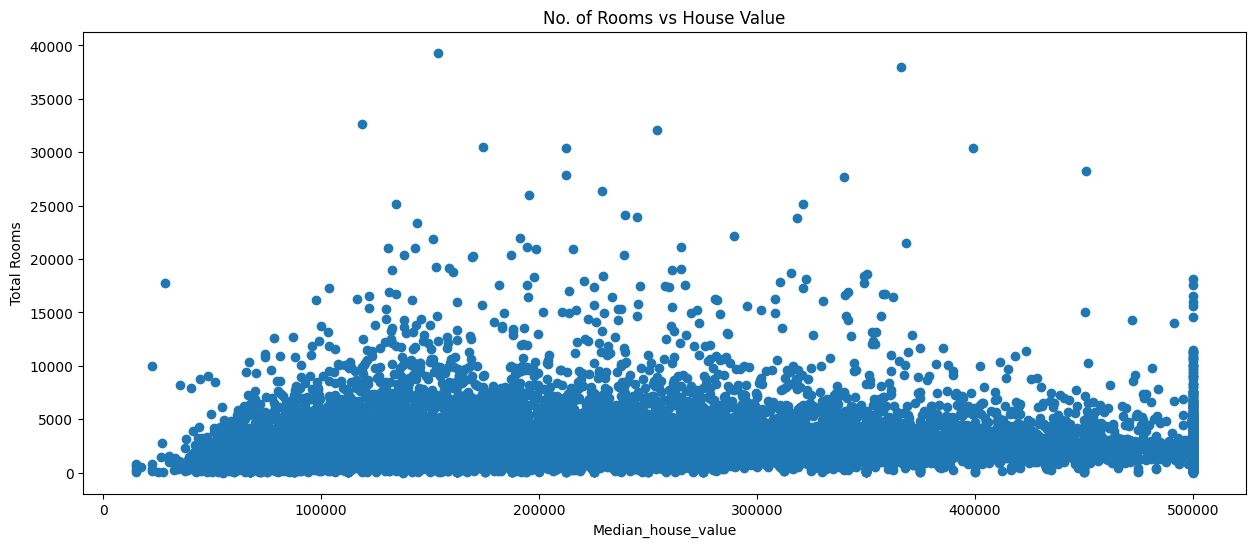

In [152]:
# Plotting Total Rooms vs Median House Value
plt.figure(figsize=(15,6))
x=df['median_house_value']
y=df['total_rooms']
plt.scatter(x,y)
plt.title('No. of Rooms vs House Value')
plt.xlabel('Median_house_value')
plt.ylabel('Total Rooms')
plt.show()

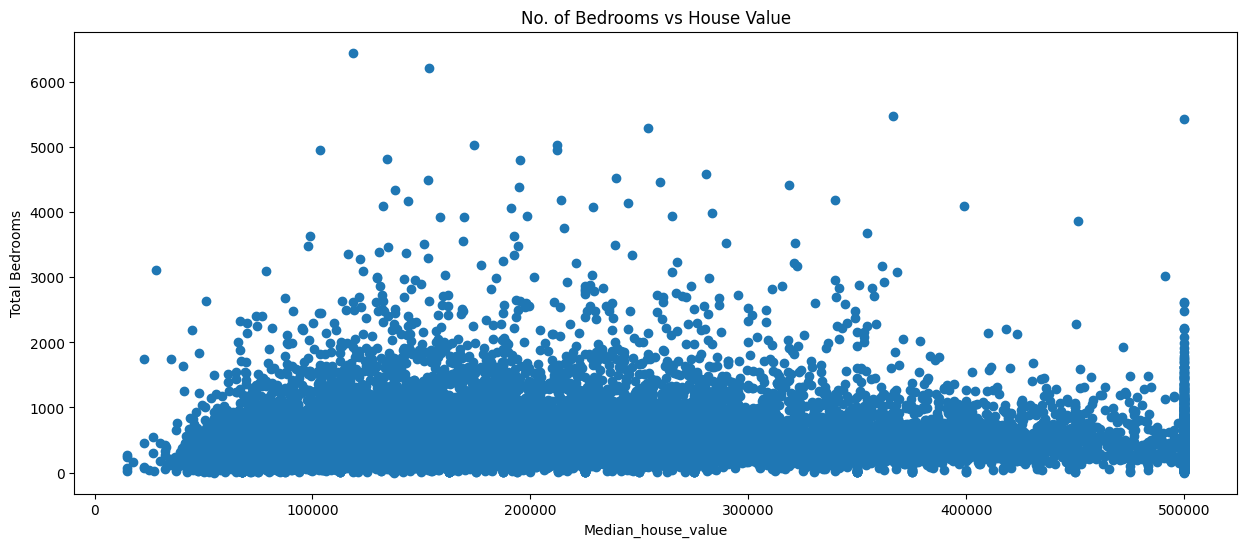

In [153]:
# Plotting Total Bedrooms vs Median House Value
plt.figure(figsize=(15,6))
x=df['median_house_value']
y=df['total_bedrooms']
plt.scatter(x,y)
plt.title('No. of Bedrooms vs House Value')
plt.xlabel('Median_house_value')
plt.ylabel('Total Bedrooms')
plt.show()

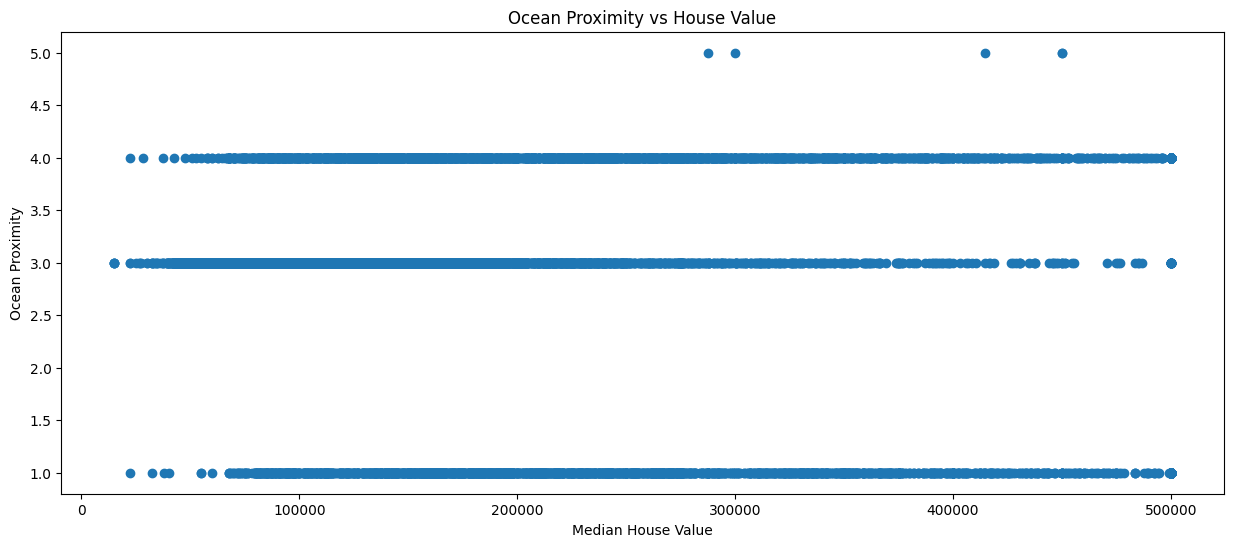

In [154]:
# Plotting Ocean Proximity vs Median House Value
plt.figure(figsize=(15,6))
x=df['median_house_value']
y=df['ocean_proximity']
plt.scatter(x,y)
plt.title('Ocean Proximity vs House Value')
plt.xlabel('Median House Value')
plt.ylabel('Ocean Proximity')
plt.show()

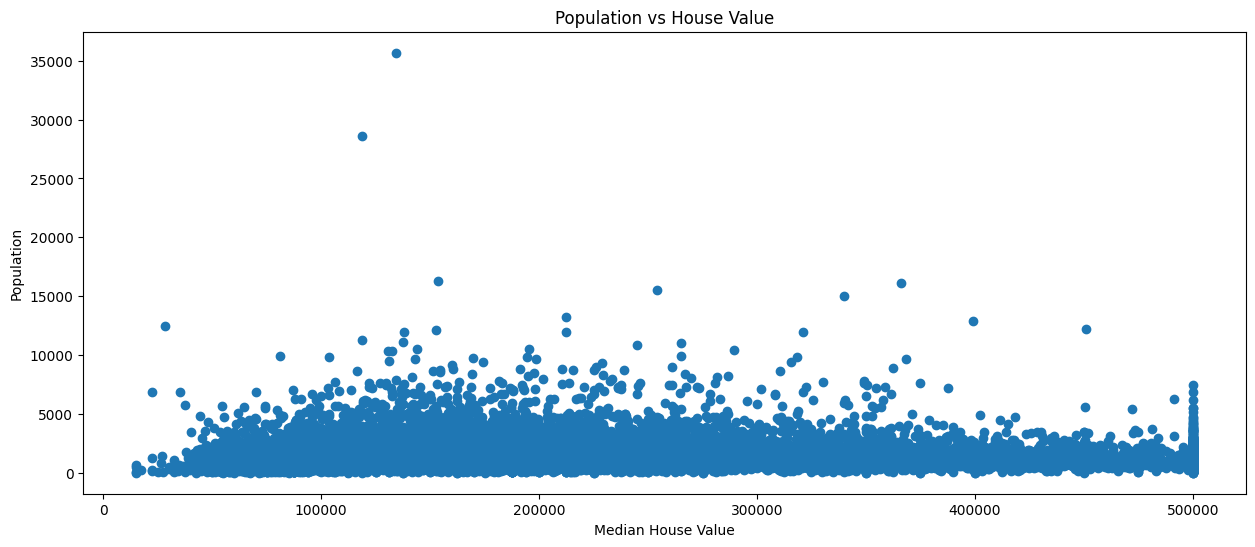

In [155]:
# Plotting Population vs Median House Value
plt.figure(figsize=(15,6))
x=df['median_house_value']
y=df['population']
plt.scatter(x,y)
plt.title('Population vs House Value')
plt.xlabel('Median House Value')
plt.ylabel('Population')
plt.show()

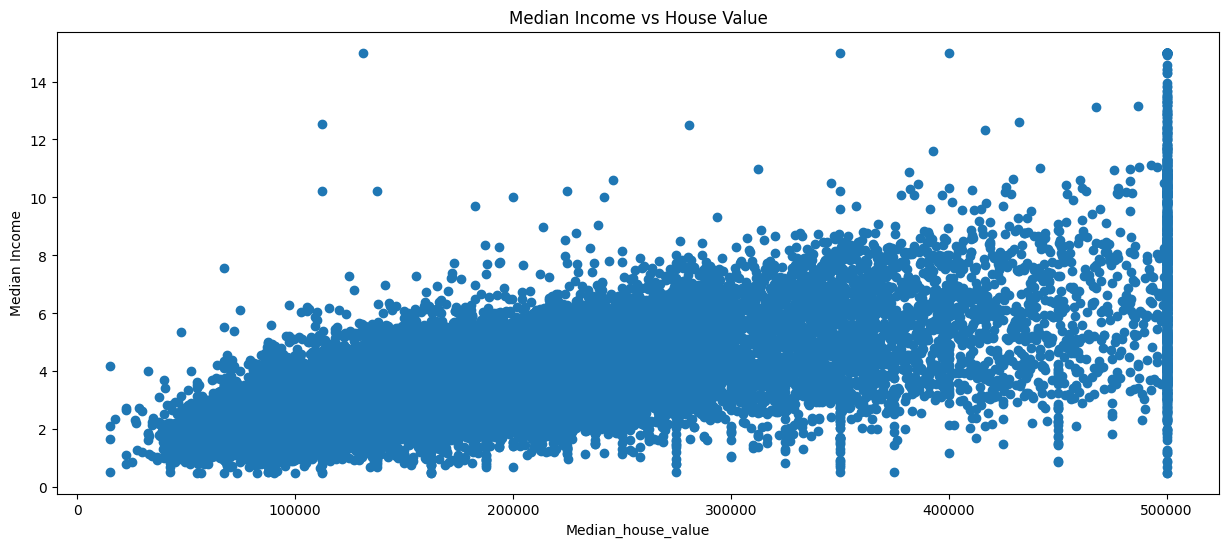

In [156]:
# Plotting Median House Value vs Median Income
plt.figure(figsize=(15,6))
x=df['median_house_value']
y=df['median_income']
plt.scatter(x,y)
plt.title('Median Income vs House Value')
plt.xlabel('Median_house_value')
plt.ylabel('Median Income')
plt.show()

<Axes: >

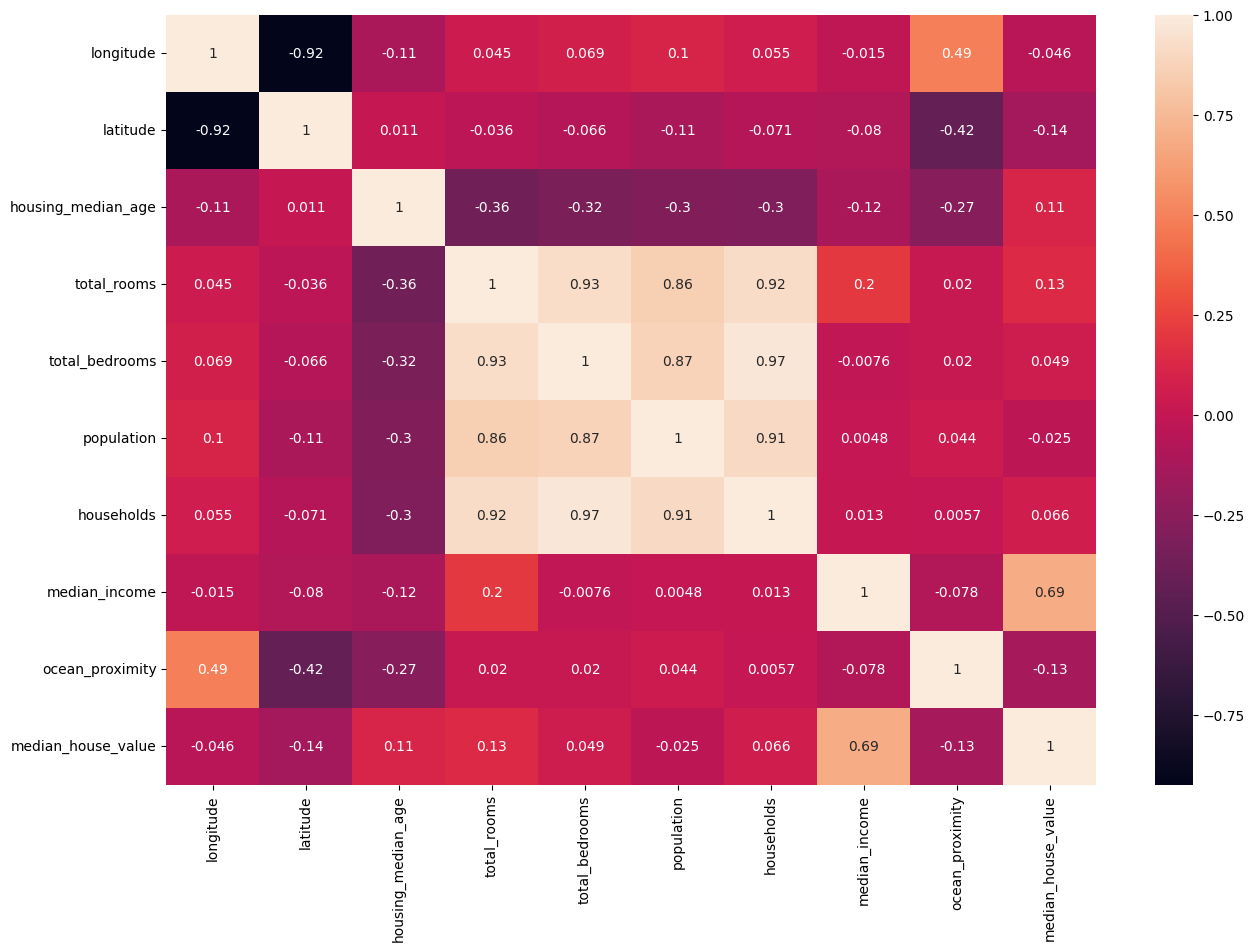

In [157]:
# Plotting heatmap
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [158]:
# Data Preprocessing

In [159]:
# Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x=df[['total_bedrooms','total_rooms','median_income']]
y=df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [160]:
# Training and Evaluating various models

In [161]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 59866.582554902845
Mean Squared Error (MSE): 6589507457.697513
R² Score: 0.5047047650748426


In [162]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
predict=model.predict(x_test)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 77053.44945090439
Mean Squared Error (MSE): 11595770613.139374
R² Score: 0.12841286441461586


In [163]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
model=RandomForestRegressor()
model.fit(x_train,y_train)
predict=model.predict(x_test)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 59155.714093992254
Mean Squared Error (MSE): 6501138303.870062
R² Score: 0.5113469642203913


In [164]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predict=model.predict(x_test)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 57403.19276554105
Mean Squared Error (MSE): 6132409281.785729
R² Score: 0.5390621961689711


In [165]:
# Support Vector Regressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
model=SVR()
model.fit(x_train,y_train)
predict=model.predict(x_test)
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 88151.91479700137
Mean Squared Error (MSE): 13918342070.331255
R² Score: -0.04616142401365342


In [166]:
# Comparing the Models to find the best fit for the dataset

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Descent'),
  Text(4, 0, 'SVR')])

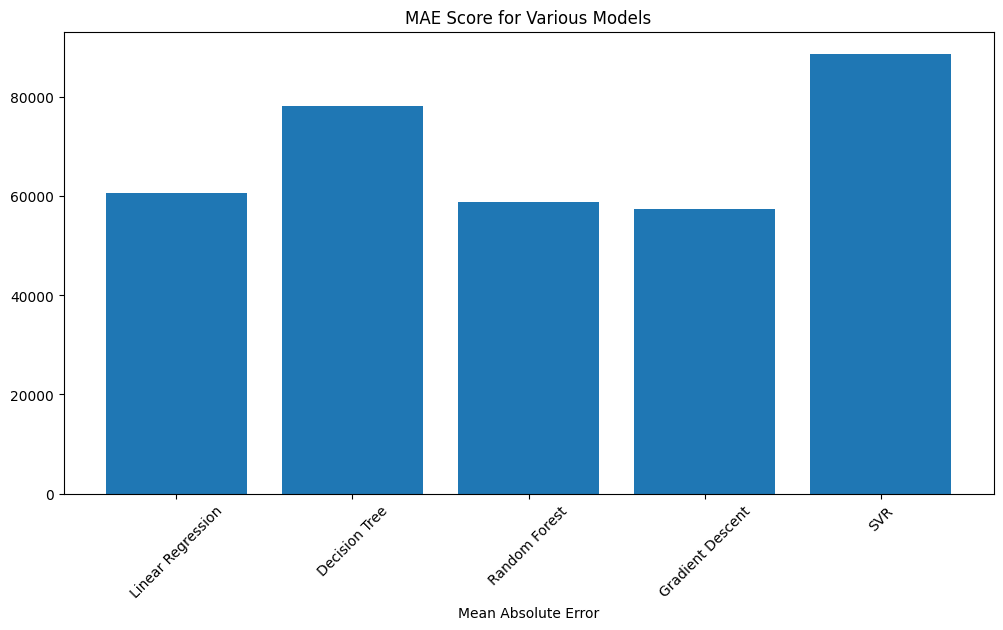

In [167]:
# Plotting MAE vs Model
results={
    'Model':['Linear Regression','Decision Tree','Random Forest','Gradient Descent','SVR'],
    'MAE':[60624.721099933144,78118.07881136952,58740.58675710594,57321.224082244495,88772.5150130185]
}
data=pd.DataFrame(results)
plt.figure(figsize=(12,6))
plt.bar(results['Model'],results['MAE'])
plt.title('MAE Score for Various Models')
plt.xlabel('Mean Absolute Error')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Descent'),
  Text(4, 0, 'SVR')])

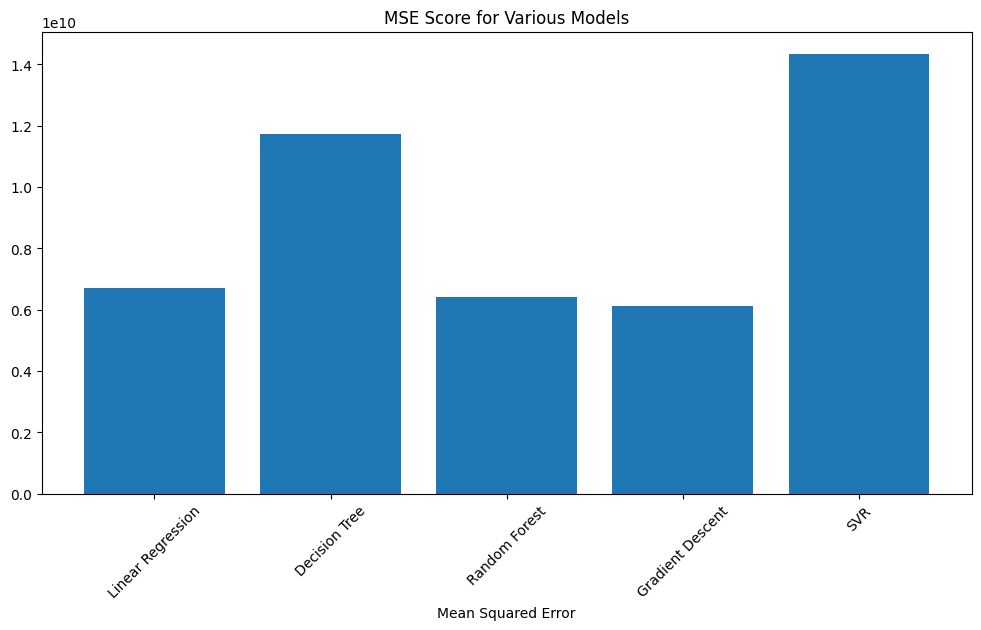

In [168]:
# PLotting MSE vs Model
results={
    'Model':['Linear Regression','Decision Tree','Random Forest','Gradient Descent','SVR'],
    'MSE':[6712920590.815972,11726489319.015503,6408456887.181597,6106278509.1692705,14349205466.546917]
}
data=pd.DataFrame(results)
plt.figure(figsize=(12,6))
plt.bar(results['Model'],results['MSE'])
plt.title('MSE Score for Various Models')
plt.xlabel('Mean Squared Error')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Descent'),
  Text(4, 0, 'SVR')])

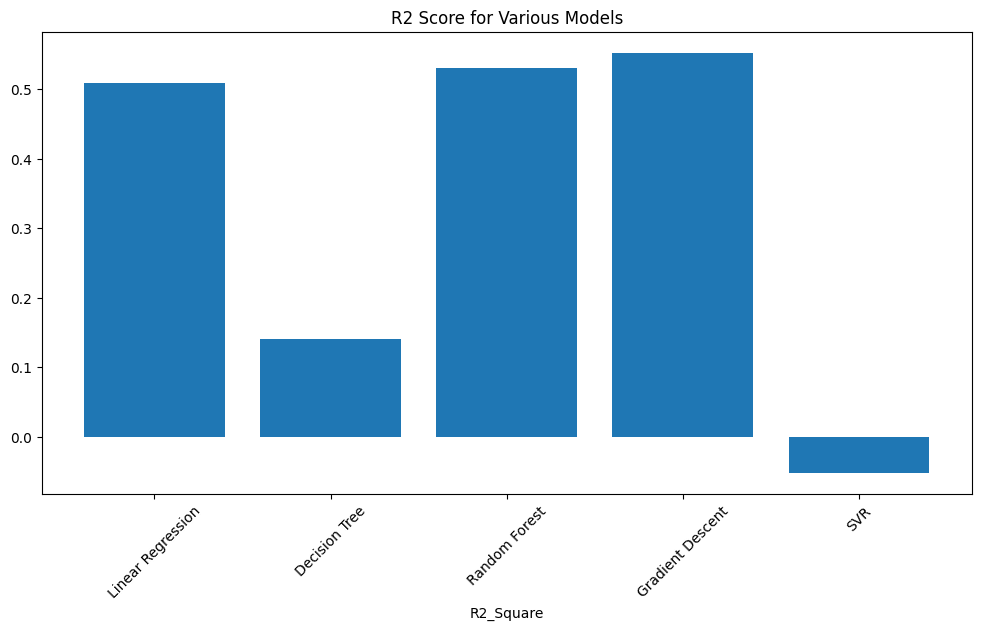

In [169]:
# Plotting R2 Score vs Model
results={
    'Model':['Linear Regression','Decision Tree','Random Forest','Gradient Descent','SVR'],
    'R2':[0.5080227485428417,0.1405877804805501,0.5303363174367499,0.5524823991389045,-0.051626124653395555]
}
data=pd.DataFrame(results)
plt.figure(figsize=(12,6))
plt.bar(results['Model'],results['R2'])
plt.title('R2 Score for Various Models')
plt.xlabel('R2_Square')
plt.xticks(rotation=45)

In [170]:
# Based on the above calculated values of MAE, MSE and R2 Score, the best model suited for it would be the Gradient Descent Model.